<a href="https://colab.research.google.com/github/Pexelevill/CSL348/blob/main/Simple_Neural_Model_to_convert_Celsius_to_Fahrenheit_using_ANN_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP#0: Import Libraries

In [3]:
# !pip install tensorflow-gpu==2.0.0.alpha0

In [4]:
#Installing compatible tensorflow
!pip install tensorflow
try:
  %tensorflow_version 1.x
except Exception:
  pass

In [5]:
#Importing required libraries for data processing and visualization

import tensorflow as tf
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt


In [6]:
print(tf.__version__)

2.15.0


## STEP #1: Import *Dataset*

In [8]:
#Mouting colab with the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#Importing dataset from drive

temp_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Celsius to Fahrenheit .csv')

In [17]:
temp_df.head() #showing top rows

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [18]:
temp_df.tail(5) #last 5 rows of the dataset

,Celsius,Fahrenheit
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [19]:
temp_df.describe() #description about dataset

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [20]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


`## STEP #2: Visualization of Dataset`

In [24]:
import seaborn as sns

In [25]:
help(sns.scatterplot)

Help on function scatterplot in module seaborn.relational:

scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)
    Draw a scatter plot with possibility of several semantic groupings.
    
    The relationship between `x` and `y` can be shown for different subsets
    of the data using the `hue`, `size`, and `style` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    `hue` and `style` for the same variable) can be helpful for making
    graphics more accessible.
    
    See the :ref:`tutorial <relational_tutorial>` for more information.


<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

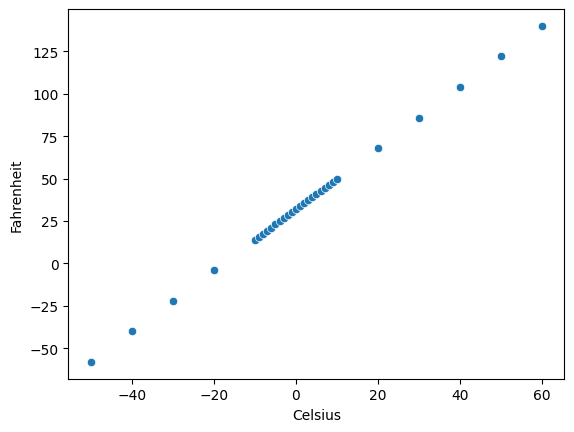

In [27]:
sns.scatterplot(x="Celsius", y="Fahrenheit", data=temp_df)

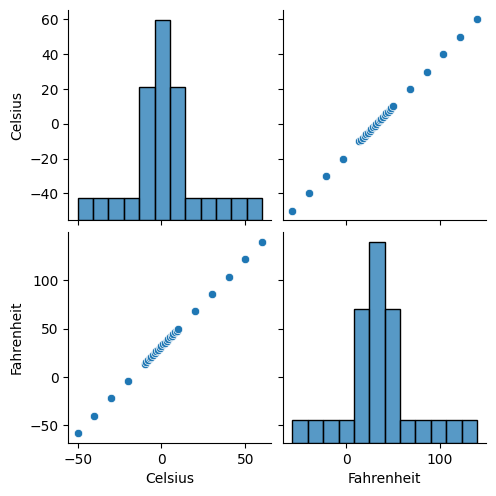

In [28]:
import seaborn as sns
sns.pairplot(temp_df)

## STEP #3: Creating Training & Testing Dataset

In [29]:
X_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

## STEP #4: Build & Train the Model

In [30]:
X_train.shape

(30,)

In [31]:
y_train.shape

(30,)

In [33]:
# in tensorflow 2.0, keras API come automatically with tensorflow 2.0
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units= 32 , input_shape = (1,)))
#Dense when we have fully connected atificial neural network
# now we are adding one more layer to the network
model.add(tf.keras.layers.Dense(units = 32))
# now adding the output layer
model.add(tf.keras.layers.Dense(units = 1))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(optimizer= tf.keras.optimizers.Adam(1), loss = 'mean_squared_error')

In [36]:
epochs_hist = model.fit(X_train, y_train, epochs=30, validation_split = 0.2)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 1106.9066 - val_loss: 20275850.0000
Epoch 2/30
1/1 [==============================] - 0s 39ms/step - loss: 3256163.2500 - val_loss: 356186720.0000
Epoch 3/30
1/1 [==============================] - 0s 39ms/step - loss: 46473644.0000 - val_loss: 233039568.0000
Epoch 4/30
1/1 [==============================] - 0s 40ms/step - loss: 49819476.0000 - val_loss: 16319652.0000
Epoch 5/30
1/1 [==============================] - 0s 43ms/step - loss: 2706870.2500 - val_loss: 8254797.5000
Epoch 6/30
1/1 [==============================] - 0s 41ms/step - loss: 2012569.0000 - val_loss: 523415.7812
Epoch 7/30
1/1 [==============================] - 0s 42ms/step - loss: 137886.3594 - val_loss: 168414704.0000
Epoch 8/30
1/1 [==============================] - 0s 63ms/step - loss: 35336744.0000 - val_loss: 805401.5625
Epoch 9/30
1/1 [==============================] - 0s 48ms/step - loss: 205429.8281 - val_loss: 234827696.0000
Epoch 10/30
1/1

## STEP #5: Evaluating the Model

In [37]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

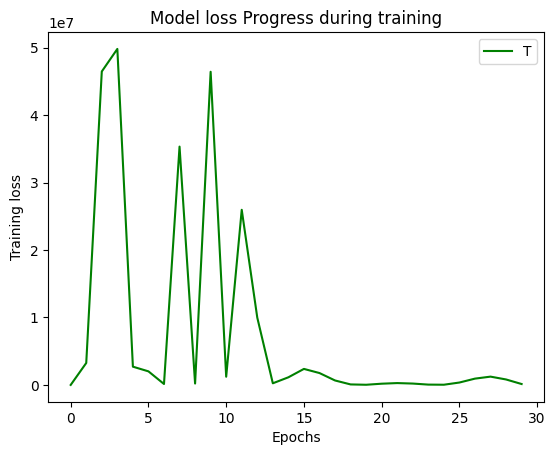

In [38]:
plt.plot(epochs_hist.history['loss'], color='green', label='Training loss')
plt.title('Model loss Progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend('Training loss')
plt.show()

Text(0, 0.5, 'Training loss')

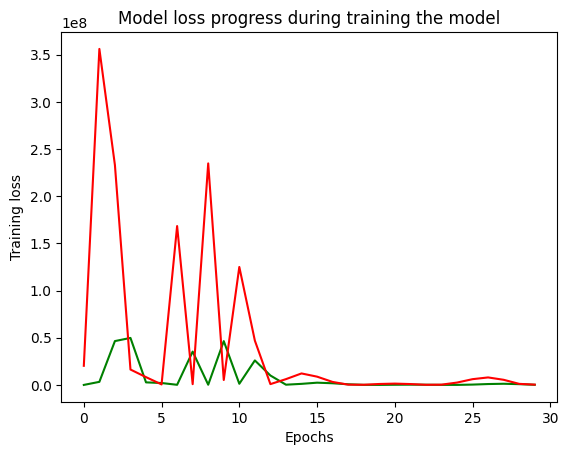

In [39]:
plt.plot(epochs_hist.history['loss'], color='green', label='Training loss')
plt.plot(epochs_hist.history['val_loss'], color='red', label='Validation loss')

plt.title('Model loss progress during training the model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')

In [40]:
model.get_weights()

[array([[-0.8217672 ,  0.8508674 ,  0.64708024,  0.71692824,  0.89967054,
         -0.50948435, -0.8473475 ,  0.55751526, -0.5495144 ,  0.511642  ,
         -0.72611713,  0.9219628 ,  0.860371  ,  0.62863815, -0.5556762 ,
          0.6792729 ,  0.47470573,  0.92612934, -0.84189874, -0.8951163 ,
          0.79087555, -0.8745552 ,  0.9107962 , -0.4771286 , -0.9057126 ,
          0.33902302, -0.6875871 , -0.913801  ,  0.33846328, -0.5351141 ,
         -0.61486256, -0.8775607 ]], dtype=float32),
 array([ 1.1564866 ,  0.14642246, -1.1165519 , -1.0814714 , -0.22908932,
         0.64641   ,  1.1803637 , -0.72100776,  0.6895281 , -0.58415985,
         1.0066831 , -0.09778333,  0.10570555, -1.0470438 ,  0.6545478 ,
        -1.0189749 , -0.48674095, -0.2354752 ,  0.22888626, -0.08244918,
         0.18947306, -0.03585168,  0.13874139,  0.8018647 , -0.16133025,
        -0.3202385 ,  1.0890028 , -0.21535678, -0.31642967,  0.6276039 ,
         0.8156808 ,  0.22223231], dtype=float32),
 array([[ 1.10

In [41]:
# Use the same model to perform predictions
Temp_C = 12
Temp_F = model.predict([Temp_C])
print('Temprature in Fahrenheit using simple ANN=', Temp_F)

1/1 [==============================] - 0s 103ms/step
Temprature in Fahrenheit using simple ANN= [[119.01487]]


In [42]:
# Lets confirm with the equation
Temp_F = 9/5 * Temp_C + 32
print('Temprature in Fahrenheit using normal equation=', Temp_F)

Temprature in Fahrenheit using normal equation= 53.6
